# 🤖 Artificial Intelligence, MACHINE LEARNING & PYTHON 🤖

## Why does it all matter? 

Artificial Intelligence is everywhere, particularly in healthcare.


![image](.//headline_1.png)

![image](.//headline_2.png)

Artificial Intelligence is going to become more and more prominent within the NHS.

![image](.//headline_3.png)

Also, Artificial Intelligence is just really interesting! (And sometimes a bit scary!) It's here to stay, so understanding it is going to be an incredibly useful skill.
Here are a final selection of headlines to show just how **versatile**, **interesting**, and **important** AI is becoming.

![image](.//headline_4.png)

![image](.//headline_5.png)

## What is todays plan? 

##### **Can we create and test an Artificial Intelligence that can predict if an individual has breast cancer?**


### Before we get into coding - let's go over some definitions.

Firstly - what actually is Artificial Intelligence? 

Online Chatbots, Amazon Alexa, a self driving Tesla, these are all examples of **machine learning** and **artificial intelligence**. 

- Artificial Intelligence (often referred to as AI) is a general term used to describe computers completing task that we would consider clever or intelligent. 

- Machine Learning is a particular application of AI, it is the idea that with data, computers can learn for themselves and make predictions. 

Today, our focus is going to be more closely aligned to machine learning. We are going to use a dataset to **train** a **machine learning model** (often just referred to as a model), so that it can make **predictions** that we can **test** and **assure**.

## Python Recap

Firstly, let's give a quick recap of python and of functions. This will help us a lot later! 

In [1]:
# This is a block of code written in python. It is written inside a box, known as a cell.
# Every time you get to a piece of code in this notebook, you will need to run it.
# There are two possible ways to do this.

# 1 - Click the triangular play button in the top left corner of the cell. 
# 2 - If you are clicked inside the cell, you can hold shift and press enter.

# Once the code has successfully ran, you will see a little blue tick.

# Sometimes, the code will also give an output, which will also appear when you have ran the code. 
# Like this!
print("Hello!")

Hello!


In [2]:
# This is a very simple function that works out percentages.
# You pass it in two numbers, called parameters.
# These represent the numerator and denominator of a fraction.
# Some simple maths is done, and the fraction is returned.  

def calculate_percentage(numerator, denominator):
    fraction = numerator / denominator
    return fraction * 100

# When you run this code snippet nothing will happen, you need to call the function for it to return you something.
# Yuo should still see a little green tick!

In [3]:
# Call the function here:
# You should see a output when you run this piece of code.
# If you get an error, make sure you have entered two numbers without speech marks between the brackets separated by a comma. 

calculate_percentage("""your value 1""", """your value 2""")

TypeError: unsupported operand type(s) for /: 'str' and 'str'

## Lets look at some data! 

Over the next few steps, we are going to follow the path of a data scientist creating a machine learning model.

**Don't worry!** This is not something you will be expected to do after this course. It is just an opportunity to learn how a machine learning model is made, and this will help you understand why we test it in certain ways later in this course.

In [3]:
# # These next few lines of code install certain packages. These contain lots and lots of functions which we can use in our coe later.

# !pip install -U scikit-learn
# !pip install pandas
# !pip install plotly
# !pip install shap

In [3]:
#Now that we have installed them, we can import certain libraries and functions. 

# This first function is used to load a pre-existing breast cancer dataset
from sklearn.datasets import load_breast_cancer

# Pandas is a library containing lots of functions used to modify and navigate dataframes.
import pandas as pd

# Plotly is a library which helps us generate plots.
import plotly.express as px

In [4]:
# We are about to use the load_breast_cancer function from sklearn 
# This line calls the function to return:

#breast_cancer_inputs  
# - This is the raw data containing information about different breast cancer screenings

#breast_cancer_outputs 
# - This contains the classification of whether each screening is identified as being breast cancer

breast_cancer_inputs, breast_cancer_outputs = load_breast_cancer(return_X_y=True, as_frame=True) 

In [1]:
# What does the data look like?
display(breast_cancer_inputs)

NameError: name 'breast_cancer_inputs' is not defined

Let's be honest, this data is really confusing and we cannot really tell anything from it!

We can create a plotting function to help us spot some trends. 

In [7]:
def produce_scatter_plot(input_dataframe: pd.DataFrame,
                         output_series: pd.Series,
                         columns:list):
    """Produces a 2D or 3D scatter plot based on columns from dataframe.

    Args:
        input_dataframe (pd.DataFrame): The dataframe containing breast cancer information
        output_series (pd.Series): The dataframe containing diagnosis information
        columns (list): The columns to plot.
    """
    
    # Generate a series of strings to use as a colour key
    colours = pd.Series(str(value) for value in output_series)
    
    #Check the length of the columns.
    # If length is 3, make a 3D plot.
    # If length is 2, make a 2D plot.
    if len(columns) == 3:
        fig = px.scatter_3d(input_dataframe, x=columns[0], y=columns[1], z=columns[2], color=colours, labels={"color": "Diagnosis", "Symbol": "Diagnosis"})
    elif len(columns) == 2:
        fig = px.scatter(input_dataframe, x=columns[0], y=columns[1], color =colours, labels={"color": "Diagnosis", "Symbol": "Diagnosis"})
    elif len(columns) != (2 or 3):
        print("Please only use 2 or 3 columns")
        return None

    # Update the graphics
    fig.update_traces(marker=dict(size = 4 if len(columns) == 3 else 10,
                              line=dict(width=2, color='DarkSlateGrey')),
                              selector=dict(mode='markers'))
    
    fig.show()
    return None

![image](.//task.png)

This plotting function can be called by passing into it breast_cancer_inputs, breast_cancer_outputs, and an array of column names.

Try using the column names to generate some 2D and 3D plots, see if you see any trends. 

In [8]:
# Remind ourselves of the column names
print(breast_cancer_inputs.columns)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [9]:
produce_scatter_plot(breast_cancer_inputs,
                     breast_cancer_outputs,
                     ['mean radius','mean texture'])

In [1]:
produce_scatter_plot(breast_cancer_inputs,
                     breast_cancer_outputs,
                     ['mean radius','mean texture', 'mean perimeter'])

NameError: name 'produce_scatter_plot' is not defined

There are 30 different columns within this dataset, meaning there are 439 different pairs you could plot in a 2D graph. Spotting patterns, or more importantly the most important patterns, is an incredibly complex task. 

Further to this, can you imagine having a 30 dimensional scatter plot to try and spot patterns. For us, it is completely impossible! But for a machine, this is something it can do easily. 

#### Can we use this data in a machine learning model? Yes!

In [11]:
from sklearn.model_selection import train_test_split

# When creating a machine learning model, it is important to have some training data and some testing data.

# Training data - this is data that is used to train the model.
# Testing data - this is data used to test the model, we will use this a lot later!

# The following function splits our data randomly to test and training data.
breast_cancer_inputs_training, breast_cancer_inputs_testing, breast_cancer_outputs_training, breast_cancer_outputs_testing = train_test_split(breast_cancer_inputs, breast_cancer_outputs, train_size=0.8)

# train_size represents the proportion of data that should be used for training
# we have gone for 80% by setting train_size to 0.8

#### There are multiple types of machine learning algorithms: 

**Classification algorithms** are machine learning techniques used to predict categorical labels or classes based on input data.

**Regression algorithms** are machine learning techniques used to predict continuous numerical values based on input data.

**Clustering algorithms** are machine learning techniques used to group similar data points together based on their inherent similarities, without any predefined labels.

![image](.//task.png)

#### Can you tell which type of algorithm we want to use?

Uncomment (remove the #) the correct type of model we want to use for our training in the code below.
Don't scroll down too far or you will see the answer!

In [12]:
# Import relevant models
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans

classification_model = RandomForestClassifier()
#regression_model = RandomForestRegressor()
#cluster_model = KMeans()

Once we have a model, our next step is to train it.

sklearn has an incredibly useful function - `fit` 

The fit method trains the algorithm on the data.

How it does this depends on the model. If you would like to know more about the random forest algorithm you can read about it here: https://www.turing.com/kb/random-forest-algorithm. But, a lot of this specific knowledge you wont need to know today. What is important is that we are using a model that can be trained -  it can use data we feed it to create a predictive algorithm.




In [13]:
# The model we are using is a classification model, as we want to make predictions to put individuals into 1 of 2 categories. 
# This is one example of a classification model, called a random forest classifier.
# Others are available, which you can look up if you would like to. 

classification_model.fit(breast_cancer_inputs_training,breast_cancer_outputs_training)

RandomForestClassifier()

And that is it, in just a few lines of code we have a machine learning model that can be used for predicting if someone has breast cancer!

We can even try it out, using the actual use case of the model. In the future, doctors will likely use the model to put in information about 1 individual patient, and see whether they have a benign or cancerous tumour. 

In [14]:
# Create a Dataframe containing the information of one randomly sampled individual.
individual_1_data = breast_cancer_inputs_testing.sample(n=1)
display(individual_1_data)

# Find out the individuals diagnosis
individual_1_diagnosis = breast_cancer_outputs_testing[(individual_1_data.index)[0]]

print("Individual 1 has a diagnosis of:",individual_1_diagnosis)
# A 0 is benign, a 1 is a cancerous.

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
440,10.97,17.2,71.73,371.5,0.08915,0.1113,0.09457,0.03613,0.1489,0.0664,...,12.36,26.87,90.14,476.4,0.1391,0.4082,0.4779,0.1555,0.254,0.09532


Individual 1 has a diagnosis of: 1


So, we now have the information for one individual. We also know what the actual outcome of the prediction should be.

Next, we can use `predict`. This uses the model we have just trained to predict the results of our test set. It really is that simple!

In [15]:
prediction = classification_model.predict(individual_1_data)
print(prediction)
# A 0 is a benign prediction, and a 1 is a cancerous prediction

[1]


Did the model get it right? It might have? But how do we know whether it will be correct every time? 



##### It's time to switch on our testing brains and start evaluating just how good this model is!

Do you remember the testing data we separated from the training data earlier? This is about 20% of the total data we have access to, and we can use it to evaluate just how good our model is. We can use the same `predict` function as above, but this time we can pass it far more data. 

Typically, you want **about** 80% of your data to be used for training, although a bit of variation from this is fine!. This gives you lots of data to train your model on, but still leaves enough for accurate testing. 

**Importantly**, this data is **labelled**. The basic premise of testing with labelled data is as follows, make your predictions (as we have just done), and then compare them.

In [16]:
predictions = classification_model.predict(breast_cancer_inputs_testing)

What do the predictions actually look like? 

In [17]:
print(predictions)

[1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1
 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1
 1 0 1]


Let's start with a really simple piece of analysis. How many of our predictions were correct? A super simple way to look at this is using a pie chart. 

In [18]:
# matplotlib is another plotting library similar to plotly.

import matplotlib.pyplot as plt

def plot_predictions(predictions, actual):
    """Creates a pie chart

    Args:
        predictions (Series): Predicted values by the model
        actual (Series): Actual values
    """

    correct_predictions = 0
    incorrect_predictions = 0

    for prediction, value in zip(predictions, actual):
        if prediction == value:
            correct_predictions += 1
        else:
            incorrect_predictions += 1

    total_predictions = len(predictions)

    # Remember our function we made earlier!
    correct_percentage = round( calculate_percentage(correct_predictions,total_predictions) ,1)
    incorrect_percentage = round( calculate_percentage(incorrect_predictions,total_predictions), 1)

    # Plot the chart
    plt.pie([correct_predictions,incorrect_predictions],
            labels=[f"Correct Predictions\n{correct_percentage}",f"Incorrect Predictions\n{incorrect_percentage}%"])
             
    # Add a title
    plt.title("Percentage of Correct and Incorrect Predictions")
    
    return None
    

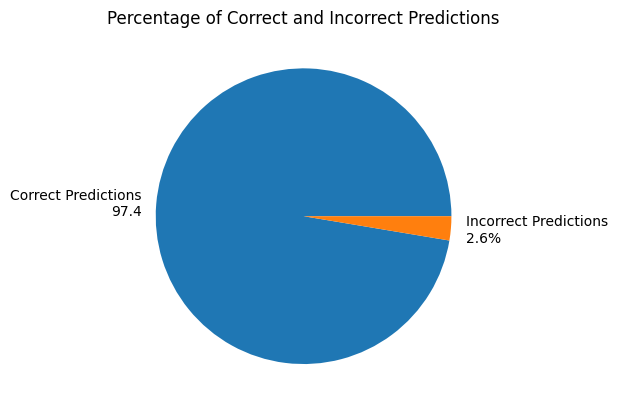

In [19]:
plot_predictions(predictions, breast_cancer_outputs_testing)

There are other ways to analyse our results. For example using a confusion matrix. 

In [20]:
from sklearn import metrics

def generate_confusion_matrix(predicted, actual):
    """Creates a confusion matrix chart

    Args:
        predictions (Series): Predicted values by the model
        actual (Series): Actual values
    """
    confusion_matrix = metrics.confusion_matrix(actual, predicted)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Benign", "Malignant"])

    cm_display.plot()

    plt.title("Confusion Matrix")

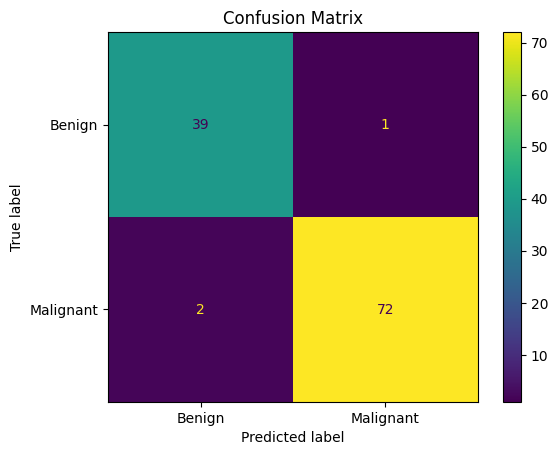

In [21]:
generate_confusion_matrix(predictions, breast_cancer_outputs_testing)

### What does this actually show? 

The matrix has four squares, each representing a different combination of actual and predicted classifications. The squares are:

- True Positive (TP): The model correctly predicted the positive diagnosis.
- False Positive (FP): The model incorrectly predicted the positive diagnosis.
- True Negative (TN): The model correctly predicted the negative diagnosis.
- False Negative (FN): The model incorrectly predicted the negative diagnosis.


In some scenarios, an algorithm may want to be intentionally biased.

- **Fire Alarms**: You would like a fire alarm to catch all fires. You would much rather a fire alarm go off when there is not a fire, than not go off when there is one. For this, we would like **high sensitivity** and **low specificity**. i.e. low false negatives and high false positives.

- **Spam Filters**: You do not want a spam filter to filter out important real emails! You care a lot about a **high specificity** and a **low sensitivity**. Therefore, you want higher false negatives and lower true positives.  

![image](.//task.png)

### Have a think - what bias would we prefer for this dataset and model?

Lets go even further with our analysis and cover something called an AUC-ROC Curve. 

Firstly, what does AUC and ROC mean? 

- ROC: Receiver Operating Characteristics
- AUC: Area Under Curve

ROC essentially is a graphical representation of the effectiveness of a binary classification model.

It plots the true positive rate (TPR) vs the false positive rate (FPR) at different classification thresholds.

The AUC curve represents the area under the ROC curve. It measures the overall performance of the binary classification model. The

The True Positive Rate (often called Recall or Sensitivity) is the ratio of positive examples that are correctly identified.

`TPR = TP / TP + FN`

FPR is the ratio of negative examples that are incorrectly classified.

`FPR = FP / TN + FP`

Lets make a plot to hopefully make more sense of all this!

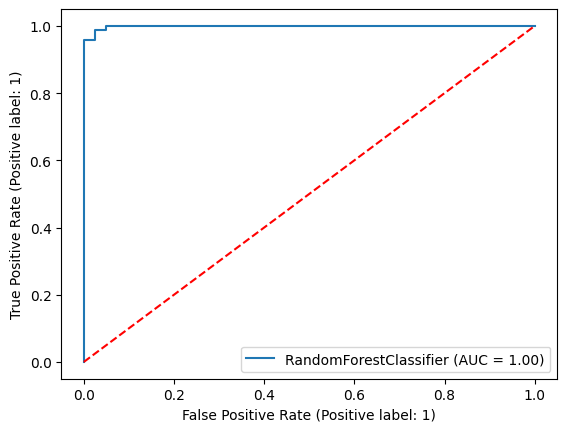

In [22]:
x = metrics.RocCurveDisplay.from_estimator(classification_model, breast_cancer_inputs_testing, breast_cancer_outputs_testing)
plt.plot([0,1],[0,1],"--",c="red")
plt.show()  

The further to the top left corner the ROC curve is, the better the prediction.

When the curve is perfectly in the top left corner, the area underneath it is 1. this means an AUC score of 1 is a perfect classifier, with 0 being the worse score.

### **It doesn't always need to be so complicated! Sometimes we just want a single number to help our evaluation!**

Another method of analysis is an **F1 Score**. This is a more general measurement for how good a classifier model is.

This is given as:

**F1 = 2 * (precision * recall) / (precision + recall)**

Where:
- **Precision** is a measure of how many predicted positive diagnosis' are actually positive. This is found by taking the number of true positives and dividing by the number of true and false positives.
- **Recall** is the percentage of positive cases that are correctly predicted by the model.

A perfect prediction would give an F1 score of 1, with the worst possible score being 0. 

The sklearn classification report is a very useful way of examining the precision, recall and f1 score of **each class** (i.e benign or malignant).

In [23]:
classification_report = metrics.classification_report(breast_cancer_outputs_testing, predictions)

print(classification_report)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        40
           1       0.99      0.97      0.98        74

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



![image](.//task.png)

**OPTIONAL**

So you have made predictions using the random forest algorithm, but could you use something else instead?

Head to https://scikit-learn.org/stable/supervised_learning.html and see what other models are available.

Can you find any better classification models for our dataset?

Feel free to go back and look at the previous code in this notebook.

In [25]:
## OPTIONAL: Your code here!

#classification_model = 


# Interrogating Training Data

As a tester, it is very important to look at training data as well as the predictions of a model.

##### Why should someone in solutions assurance care about checking training data?

- Being able to check the training data of a model is a key way to spot any flaws in the data
- Flaws in the training data will be reflected in the predictive model.
- Models may make incorrect predictions based on bad quality training data. 

One particular method we can use to check the training data is to look at **correlation** between variables.

#### Why do we care about correlation?

 - Highly correlated variables essentially contain the same information.
 - When this happens, it becomes difficult for the model to distinguish the individual effects of each variable during training. This can lead to unstable and unreliable predictions.
 - Highly correlated variables can dominate the machine learning model.
 - Data Scientists often remove highly correlated variables, this ensure that each  variable contributes unique and independent information to the model, allowing for more accurate and reliable predictions.
 - However, we can't assume data scientists always do this! So it is important to check for ourselves.

We have just been given the training data for a regression model that predicts the diabetic progression of an individual. The data scientist claims he checked the training data before making the model, but we want to be sure! 

In [24]:
from sklearn.datasets import load_diabetes

# Here, we load the diabetes inputs and outputs using the load diabetes function. 

# Earlier we used clear variables named breast_cancer_inputs and breast_cancer_outputs.

# Sadly, data scientists often like to be more concise (and confusing), and like to use X and y.
# You will likely see this a lot online, so it is good to practice this notation. 

diabetes_X, diabetes_y = load_diabetes(return_X_y=True, as_frame=True)
# Here diabetes_X represents inputs, and diabetes_y represents outputs.

Let's have a look at the training data.

In [25]:
display(diabetes_X)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


### Correlation Matrix

In [26]:
corr = diabetes_X.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


![image](.//task.png)

This correlation plot shows the correlation between each variable/column.
- Values close to 1 show high positive correlation.
- Values close to -1 show high negative correlation.


**Looking at this plot, which 2 columns show the highest correlation?**

As a tester, you may want to report this finding back to the developers.

A data scientist would often remove columns that are highly correlated.

In the code below, remove one of the columns to reduce highly correlated features. 

In [27]:
#remove a column
#diabetes_X = diabetes_X.drop("put_the_name_of_a_column_here", axis=1)
#check the column is removed
display(diabetes_X)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


Is there anything else looking a bit odd with this data? Maybe you have noticed that the `sex` values are either 0.050680 or -0.044642?

That could be a bit odd, let's do some exploring.

In [28]:
sex_value_counts = diabetes_X["sex"].value_counts()
print(sex_value_counts)

-0.044642    235
 0.050680    207
Name: sex, dtype: int64


In this case, it all looks pretty normal. Firstly, there are only 2 values, which is a good sign! Secondly, it is normal for data scientists to apply transformations to training data to make it all a similar size, i.e. between 1 and -1. In this case, there doesn't seem to be a problem with the data, but it is always a good idea to keep your eyes peeled on training data!

### Regression Models

A Data Scientist has used the above dataset to train a regression model. They have sent you the following code that they used to create a model to predict the progression of diabetes. 

In [29]:
from sklearn.linear_model import LinearRegression

X_training, X_testing, y_training, y_testing = train_test_split(diabetes_X, diabetes_y, train_size=0.03)

regression_model = LinearRegression()
regression_model.fit(X_training,y_training)

y_predictions = regression_model.predict(X_testing)

from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_testing, y_predictions)

print(f"Mean Absolute Percentage Error for model 1: {round(mape,2) * 100}%")
print("See, my model is amazing!")

Mean Absolute Percentage Error for model 1: 134.0%
See, my model is amazing!


First up, what is the mean absolute percentage error (MAPE)? It represents the average of the absolute percentage errors of each entry in a dataset. 

This means that, for each data point in the testing data, the absolute percentage error is calculated. These are then all added up together and averaged to come up with the MAPE number. The closer to 0 the MAPE, the better the model.

![image](.//task.png)

Look again at the above code form the data scientist. There is **1** mistake / piece of bad practice that will reduce the accuracy of their code. Can you spot it? 👀

Fix the mistake and rerun the code, does the MAPE decrease?

#### Feature Importance

Something else that is very important to consider is feature importance. This can be considered for both regression and classification models, so we could **(and in future should!)** have done this for our previous example.

This is an exploration into which features of the model (these are your column names or variables), have the greatest impact on the outcome of the model. 

There are many reason why this is an important step for testers. 2 important ones are:
- By understanding which columns are the most important, you can narrow down your search for bugs or bad input data.
- Certain columns may be dominating the predictions, for example, a model could be making predictions almost entirely based off the value of one column. In this case we can ask - do we need a machine learning model at all?
 

In [30]:
# shap is the module we wll use to run feature importance
import shap 

# we pass shap our classification model, alongside the training data
explainer = shap.LinearExplainer(regression_model,masker=shap.maskers.Impute(data=X_training))
# we then pass shap our testing inputs.
shap_values = explainer.shap_values(X_testing)
# shap then creates a plot for us showing which features are the most important
shap.summary_plot(shap_values, X_test_array, plot_type="violin")

# In the plot_type parameter, you may wish to try out "violin", "dot" or "bar"

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
Estimating transforms: 100%|██████████| 1000/1000 [00:00<00:00, 3053.44it/s]


NameError: name 'X_test_array' is not defined

![image](.//task.png)

Before we move onto something new, see if you can answer these questions. From this plot, can you tell:

- Which feature has the greatest impact on the model?

- Which feature has the smallest impact on the model?

- Is this what we expect to see? 

## Deep Learning and Neural Networks!

What on earth is deep learning and neural networks?

- **Deep Learning** is a type of machine learning that uses neural networks as it's model for solving problems.

- **Neural Networks** are a computational model inspired by the human brain's neural connections, composed of interconnected nodes (neurons) that process and transmit data to perform various tasks such as pattern recognition or decision-making.

Neural Networks are kind of **the big thing** at the moment.

Chat GPT is made using a neural network, facial recognition uses neural networks, speech recognition, image generation, there are endless examples!


So how do they work?

- A neural network is a computational model inspired by the human brain's neural connections.
- It consists of interconnected nodes called neurons, organized into layers: input layer, hidden layers, and output layer.
- Each neuron receives input data and applies a weight to it, representing the strength of its connection to the next layer.
- The weighted inputs are combined and passed through an activation function to introduce non-linearity, determining whether the neuron should "fire" or not.
- The process is repeated through the hidden layers, allowing the network to learn complex patterns and relationships in the data.
- During training, the network adjusts the weights based on the error (difference between predicted and actual output) using optimization algorithms like gradient descent.
- The training process iteratively refines the network's ability to make accurate predictions or classifications.
- Once trained, the neural network can be used to process new data and make predictions or decisions based on the learned patterns.

In [36]:
from sklearn.datasets import make_blobs, make_moons, make_swiss_roll
import numpy as np


# Use the make_blobs function to generate inputs and outputs
X, y = make_swiss_roll(n_samples=2000,noise=0.1, random_state=1)
#X_blob,y_blob = make_blobs(n_samples = 2000, n_features=3, centers = 3, cluster_std=1.5, random_state=5)
new_X = []
new_y = []
for i in range(len(X)):
    
    new_X.append( list(X[i]) + list(np.random.rand(1)) )
    new_y.append(y[i])
    #new_X.append(list(X_blob[i] / 5) )
    #new_y.append(y_blob[i] + 2)


X = (pd.DataFrame(new_X))
y = new_y
    

In [38]:
produce_scatter_plot(X,y,[1,0,2])

In [426]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)


In [427]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=1).fit(X_train, y_train)
predictions = clf.predict(X_test)

Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.


In [428]:
produce_scatter_plot(X_test,y_test,[0,1,2])

In [354]:
import numpy as np

classifier = MLPClassifier(random_state=1, max_iter=20, batch_size=20)

tolerance = 0.0001

for epoch in range(200):

    classifier.partial_fit(X_train, y_train, classes = np.unique(y_train))

    loss = classifier.loss_curve_

    if len(loss)>2:
        change_in_loss = (loss[-2] - loss[-1])
    
        if change_in_loss < tolerance:
            print("Change in loss is",'{:0.6f}'.format(change_in_loss), "which is less than the tolerance of", tolerance)
            print(f"Stopping at epoch", epoch)
            break

    



Change in loss is 0.000098 which is less than the tolerance of 0.0001
Stopping at epoch 76


In [355]:
predictions = classifier.predict(X_test)

In [356]:
blob_plot(X_test,predictions)

Text(0, 0.5, 'Loss')

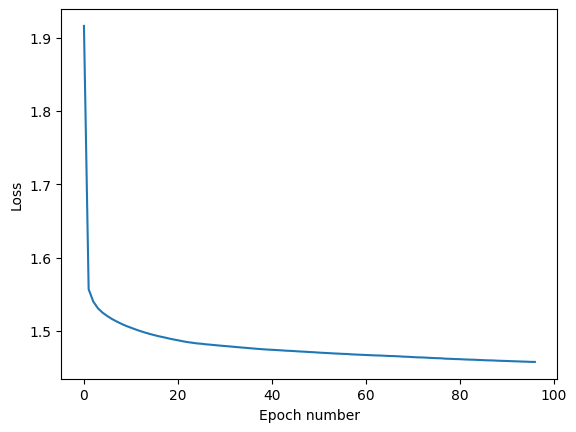

In [179]:
plt.plot(loss)
plt.xlabel("Epoch number")
plt.ylabel("Loss")